# Day 2 class material: Pandas

- Programming in Python for Business and Life Science Analytics (MGT001437, englisch)
- School of Management & School of Life Sciences, <span style = "color: blue">Technical University of Munich</span> 


__Pandas__ provides powerful tools to read, manipulate, and analyze data efficiently.

In [5]:
# pip install pandas
import pandas as pd

In [2]:
# The current folder.
path = "./"

Initialize a dataframe: From Lists to DataFrame

In [6]:
# A simple list
data_list = [10, 20, 30, 40, 50]

# Convert list to DataFrame
df = pd.DataFrame(data_list, columns=['Numbers'])

In [7]:
df

,Numbers
0,10
1,20
2,30
3,40
4,50


In [8]:
df['alphabet']  =  ['a','b','c','d','e']
df

,Numbers,alphabet
0,10,a
1,20,b
2,30,c
3,40,d
4,50,e


In [5]:
# nested list
data = [['a', 1],
        ['b', 2]]

# Convert list to DataFrame
df = pd.DataFrame(data, columns = ['model', 'price'])

df

,model,price
0,a,1
1,b,2


In [19]:
# A list of dictionaries
data_list = [
    {'ID': 1, 'Name': 'Alice', 'Age': 24},
    {'ID': 2, 'Name': 'Bob', 'Age': 19},
    {'ID': 3, 'Name': 'Charlie', 'Age': 23}
]

# Convert list to DataFrame
df = pd.DataFrame(data_list)

df

,ID,Name,Age
0,1,Alice,24
1,2,Bob,19
2,3,Charlie,23


From Dictionaries to DataFrame
- When you have a dictionary where each key corresponds to a list of values, pandas will treat the keys as column names and the lists as the data for those columns.

In [8]:
# Dictionary of lists
data = {
    'model': ['a', 'b'], 
    'price' : [1,2]
    }

# Convert dictionary to DataFrame
df = pd.DataFrame(data)

- the scalar value __True__ for 'Employed' will be repeated for all rows in the DataFrame, showing how pandas can broadcast a single value across multiple rows.

In [10]:
# Dictionary with mixed types
data_dict = {
    'ID': [1, 2, 3],
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Employed': True  # Scalar value, will be broadcasted
}

# Convert dictionary to DataFrame
df = pd.DataFrame(data_dict)

df

,ID,Name,Employed
0,1,Alice,True
1,2,Bob,True
2,3,Charlie,True


In [12]:
# Dictionary of dictionaries
data_dict = {
   # index 
    '100': {'Name': 'Alice', 'Age': 24},
    '101': {'Name': 'Bob', 'Age': 19},
    '102': {'Name': 'Charlie', 'Age': 23}
}

# Convert dictionary to DataFrame
df1 = pd.DataFrame.from_dict(data_dict, orient='index')

df1


,Name,Age
100,Alice,24
101,Bob,19
102,Charlie,23


- add a new column 'ID'
- pd.concat
- .T
- read excel @ ExcelFile

In [ ]:
xls = pd.ExcelFile('Sectors_agg.xlsx')

# to read all sheets to a map
sheet_to_df_map = {}
for sheet_name in xls.sheet_names:
    sheet_to_df_map[sheet_name] = xls.parse(sheet_name)

-  __DataFrame__: a DataFrame is a tabular data structure with rows and columns, similar to a spreadsheet.   
Read CSV: https://www.geeksforgeeks.org/python-read-csv-using-pandas-read_csv/ 

### Sample Data Structure:
- __Date__: The date on which the data was recorded, formatted as YYYY-MM-DD.
- __Store__: An identifier for the store, which appears to be a numerical ID.
- __Temperature__: The temperature on the recorded date, in degrees Fahrenheit.
- __Fuel_Price__: The cost of fuel per gallon on the recorded date, in USD.
- __MarkDown1 to MarkDown5__: These columns represent promotional markdowns at the store. Not all markdowns are applied on all days, as indicated by empty fields.
- __CPI__: The Consumer Price Index on the recorded date, a measure that estimates the average price of consumer goods and services purchased by households.
- __Unemployment__: The unemployment rate as a percentage on the recorded date, indicating the economic condition around the area of the store.
- __IsHoliday__: A boolean value (TRUE or FALSE) indicating whether the recorded date was a holiday.

In [36]:
# Step 1: Read csv file
filename = "store1features.csv"
df = pd.read_csv(filename)
# index_col = ['Date', 'Store']
# usecols=['Date','Store', 'Temperature','Fuel_Price']
df.head()

,Date,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,2010-02-05,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,2010-02-12,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,2010-02-19,1,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,2010-02-26,1,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,2010-03-05,1,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [43]:
# Step 2: set index as datetime
df['Date'] = pd.to_datetime(df['Date']) # change to date time
df.index = df['Date']
df.head()

,Date,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,,
2010-02-05,2010-02-05,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2010-02-12,2010-02-12,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2010-02-19,2010-02-19,1,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
2010-02-26,2010-02-26,1,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
2010-03-05,2010-03-05,1,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 182 entries, 2010-02-05 to 2013-07-26
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          182 non-null    datetime64[ns]
 1   Store         182 non-null    int64         
 2   Temperature   182 non-null    float64       
 3   Fuel_Price    182 non-null    float64       
 4   MarkDown1     90 non-null     float64       
 5   MarkDown2     73 non-null     float64       
 6   MarkDown3     89 non-null     float64       
 7   MarkDown4     90 non-null     float64       
 8   MarkDown5     90 non-null     float64       
 9   CPI           169 non-null    float64       
 10  Unemployment  169 non-null    float64       
 11  IsHoliday     182 non-null    bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 17.2 KB


In [54]:
# Task 1: Select all rows in Feburary 2010
feb_2010_data = df.loc['2010-02']
feb_2010_data

,Date,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,,
2010-02-05,2010-02-05,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2010-02-12,2010-02-12,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2010-02-19,2010-02-19,1,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
2010-02-26,2010-02-26,1,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
2010-03-05,2010-03-05,1,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
2010-03-12,2010-03-12,1,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
2010-03-19,2010-03-19,1,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
2010-03-26,2010-03-26,1,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False


In [ ]:
# Alternative method using boolean masking
# If your 'Date' column is not the index or you prefer a method that doesn't rely on indexing, you can also do this:
feb_2010_data = df[(df.index >= '2010-02-01') & (df.index <= '2010-02-28')]

# Task 2: Select all rows from February(different years)
# Filter the DataFrame to only include rows where the month is February
february_data = df[df.index.month == 2]

# Alternative method: Use query to select February
february_data = df.query('Date.dt.month == 2')

In [ ]:
# Task 3: find the max date row:

# Find the maximum date
# max_date = df['Date'].max()

# Select the row(s) with the maximum date
# max_date_row = df[df['Date'] == max_date]


# Find the maximum date in the index
max_date_index = df.index.max()

# Retrieve the row with the maximum date
row_with_max_date = df.loc[max_date_index]

Difference between slicing with numbers and slicing with labels.  
- The __df.loc__ method is used for _label-based_ indexing, which means you use the __actual labels__ of your index to retrieve data. It can select rows, columns, or specific values based on these labels.  
- The __df.iloc__ method is used for _integer-location_ based indexing, meaning you use __integers__ to select the rows and columns. This method is primarily useful when you know the position (i.e., integer index) of the elements you want to access.

In [58]:
df.iloc[2:3] 

,Date,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,,
2010-02-19,2010-02-19,1,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False


In [29]:
# We use reset_index to get the default range index instead of a date
df.reset_index(drop=True).loc[2:3] # selects 2 rows ! (Because 2:3 is a slice of labels)

,Date,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
2,2010-02-19,1,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,2010-02-26,1,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False


In [7]:
# Access a single row by index label
row = df.loc['2010-03-05']

# Access multiple rows by index label
rows = df.loc[['2010-03-05', '2013-07-19']]


In [24]:
# Access specific columns across all rows
subset = df.loc[:, ['Temperature', 'Fuel_Price']]

# Access specific columns for specific rows
subset = df.loc[['2010-03-05', '2013-07-19'], ['Temperature', 'Fuel_Price']]

subset


,Temperature,Fuel_Price
Date,,
2010-03-05,46.50,2.625
2013-07-19,79.26,3.556


Boolean Condition: (df['Temperature'] > 30) & (df['Temperature'] < 40) generates a boolean mask where each True represents a row in the DataFrame that meets both conditions.  
Using __df.loc__ with Boolean Array: Although df.loc is primarily used for label-based indexing, when given a boolean array, it filters the rows accordingly. This approach is very clean and explicit, making the code easy to read and understand.

In [25]:
# Task 5: filter
# Apply the filter
filtered_df = df[(df['Temperature'] > 30) & (df['Temperature'] < 40)]
filtered_df

,Date,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,,
2010-02-12,2010-02-12,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2010-02-19,2010-02-19,1,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
2011-01-14,2011-01-14,1,35.40,2.983,NaN,NaN,NaN,NaN,NaN,211.457411,7.742,False
2011-02-11,2011-02-11,1,36.39,3.022,NaN,NaN,NaN,NaN,NaN,212.936705,7.742,True


In [ ]:
# Task 5: filter
# Apply the filter
filtered_df = df[(df['Temperature'] > 30) & (df['Temperature'] < 40)]

# Filter using df.loc with a boolean condition
filtered_df = df.loc[(df['Temperature'] > 30) & (df['Temperature'] < 40)]

"""## Boolean Indexing"""

df['Temperature'] > 90

df[ (df['Temperature'] > 90) ]

df[ (df['Temperature'] >= 85) & (df['Temperature'] < 90)] # logical AND

df[ (df['Temperature'] < 40) | (df['Temperature'] > 90)] # logical OR

In [59]:
"""## Example: .(isin)"""
data = pd.DataFrame({'model': ['a', 'b', 'c'],
                     'price' : [1,2,3]})
data

,model,price
0,a,1
1,b,2
2,c,3


In [ ]:
data[ (data['model'] == 'a') | (data['model'] == 'c')]

data['model'].isin(['a','c'])

data[data['model'].isin(['a','c'])]

data[data['model'].isin(['a','c'])]['price']

In [ ]:
# Remove a column
temperature = df.pop('Temperature')
df.info()

# Re-insert it before the first column
df.insert(0, 'Temperature', temperature)
df.info()

### Sorting and Sampling

In [ ]:
df = pd.read_csv(path + 'store1features.csv')
df.index = pd.to_datetime(df['Date'])
df = df[['Temperature', 'Fuel_Price', 'IsHoliday']]
df.head()

df.sort_values(by='Temperature', ascending=[False]).head()

df.sort_values(by=['IsHoliday', 'Temperature'], ascending=[False,False]).head()

subdf = df.sample(n=5) # This is random, so the result will change every time you run it
subdf

subdf.sort_index()

Farenheit to Celsius

In [73]:
df = pd.read_csv('store1features.csv')
df.index = pd.to_datetime(df['Date'])
df['Temperature'] = (df['Temperature'] - 32)*5/9 
df

,Date,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,,
2010-02-05,2010-02-05,1,5.727778,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2010-02-12,2010-02-12,1,3.616667,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2010-02-19,2010-02-19,1,4.405556,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
2010-02-26,2010-02-26,1,8.127778,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
2010-03-05,2010-03-05,1,8.055556,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2013-06-28,2013-06-28,1,28.855556,3.495,4205.98,796.70,6.84,3816.78,4812.74,NaN,NaN,False
2013-07-05,2013-07-05,1,26.583333,3.422,7649.99,3503.29,1766.77,9454.96,1079.89,NaN,NaN,False
2013-07-12,2013-07-12,1,28.400000,3.400,6089.94,1362.42,209.62,2367.42,2651.05,NaN,NaN,False


In [74]:
~df['IsHoliday']

# Same as
import numpy as np
np.logical_not(df['IsHoliday'])

Date
2010-02-05     True
2010-02-12    False
2010-02-19     True
2010-02-26     True
2010-03-05     True
              ...  
2013-06-28     True
2013-07-05     True
2013-07-12     True
2013-07-19     True
2013-07-26     True
Name: IsHoliday, Length: 182, dtype: bool

missing data handling

In [81]:
df

,Date,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,,
2010-02-05,2010-02-05,1,5.727778,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2010-02-12,2010-02-12,1,3.616667,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2010-02-19,2010-02-19,1,4.405556,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
2010-02-26,2010-02-26,1,8.127778,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
2010-03-05,2010-03-05,1,8.055556,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2013-06-28,2013-06-28,1,28.855556,3.495,4205.98,796.70,6.84,3816.78,4812.74,NaN,NaN,False
2013-07-05,2013-07-05,1,26.583333,3.422,7649.99,3503.29,1766.77,9454.96,1079.89,NaN,NaN,False
2013-07-12,2013-07-12,1,28.400000,3.400,6089.94,1362.42,209.62,2367.42,2651.05,NaN,NaN,False


In [85]:
# This works with non-floating-point columns

# if you want to use np.isnan(df), make sure df is all floating numbers

df['MarkDown1'].notna()

# or

~df['MarkDown1'].isna()


Date
2010-02-05    False
2010-02-12    False
2010-02-19    False
2010-02-26    False
2010-03-05    False
              ...  
2013-06-28     True
2013-07-05     True
2013-07-12     True
2013-07-19     True
2013-07-26     True
Name: MarkDown1, Length: 182, dtype: bool

In [84]:
import numpy as np

df[~df['MarkDown1'].isna() & ~df['MarkDown2'].isna() & ~df['MarkDown3'].isna() & ~df['MarkDown4'].isna()]

# or

df[df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4']].notna().all(axis=1)]

,Date,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,,
2011-11-11,2011-11-11,1,15.061111,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False
2011-11-18,2011-11-18,1,16.805556,3.308,6074.12,254.39,51.98,427.39,5988.57,218.220509,7.866,False
2011-11-25,2011-11-25,1,15.633333,3.236,410.31,98.00,55805.51,8.00,554.92,218.467621,7.866,True
2011-12-02,2011-12-02,1,9.394444,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,False
2011-12-09,2011-12-09,1,6.627778,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2013-06-28,2013-06-28,1,28.855556,3.495,4205.98,796.70,6.84,3816.78,4812.74,NaN,NaN,False
2013-07-05,2013-07-05,1,26.583333,3.422,7649.99,3503.29,1766.77,9454.96,1079.89,NaN,NaN,False
2013-07-12,2013-07-12,1,28.400000,3.400,6089.94,1362.42,209.62,2367.42,2651.05,NaN,NaN,False


In [ ]:
df.dropna(axis = 0) # Rows
df.dropna(axis = 1) # Columns

In [92]:
# fill na 
# should assign it to a column

df['MarkDown1'] = df['MarkDown1'].fillna(df['MarkDown1'].mean())
df

,Date,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,,
2010-02-05,2010-02-05,1,5.727778,2.572,8536.592778,NaN,NaN,NaN,NaN,211.096358,8.106,False
2010-02-12,2010-02-12,1,3.616667,2.548,8536.592778,NaN,NaN,NaN,NaN,211.242170,8.106,True
2010-02-19,2010-02-19,1,4.405556,2.514,8536.592778,NaN,NaN,NaN,NaN,211.289143,8.106,False
2010-02-26,2010-02-26,1,8.127778,2.561,8536.592778,NaN,NaN,NaN,NaN,211.319643,8.106,False
2010-03-05,2010-03-05,1,8.055556,2.625,8536.592778,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2013-06-28,2013-06-28,1,28.855556,3.495,4205.980000,796.70,6.84,3816.78,4812.74,NaN,NaN,False
2013-07-05,2013-07-05,1,26.583333,3.422,7649.990000,3503.29,1766.77,9454.96,1079.89,NaN,NaN,False
2013-07-12,2013-07-12,1,28.400000,3.400,6089.940000,1362.42,209.62,2367.42,2651.05,NaN,NaN,False


Automatic Index Alignment

In [75]:
sales = pd.DataFrame([['a', 1, 1, -1],
                     ['b', 1, 2, 2],
                     ['a', 2, 3, -1],
                     ['b', 2, 4, 2]], columns = ['model', 'shop', 'sales', 'price'])
sales

,model,shop,sales,price
0,a,1,1,-1
1,b,1,2,2
2,a,2,3,-1
3,b,2,4,2


In [76]:
dics = {'a':"apple", "b":"banana"}

In [77]:
sales['model'] = sales['model'].map(dics)
sales

,model,shop,sales,price
0,apple,1,1,-1
1,banana,1,2,2
2,apple,2,3,-1
3,banana,2,4,2


### Web Scrapping Example

In [3]:
df = pd.read_csv('data_0_30.csv')
df

,Unnamed: 0,reviews,date,rating
0,0,A quintessential and popular Biergarten in the...,"May 10, 2024",4.0
1,1,Awesome medieval tavern vibe. Delicious sausag...,"Apr 4, 2024",5.0
2,2,Visiting the Hofbräuhaus while in Munich is de...,"Apr 1, 2024",5.0
3,3,Came here for a beer and had a great experienc...,"Apr 19, 2024",5.0
4,4,"A must visit when in Munich. Part of a chain,...","May 28, 2024",5.0
...,...,...,...,...
297,297,"Yeah, I know that this place is an institution...","Jun 19, 2019",2.0
298,298,Nice exerience and they have their own brand-s...,"Jul 27, 2022",5.0
299,299,The whole roasted pork was very nice comparing...,"Dec 25, 2017",5.0
300,300,"Good beer, good food, terrible service. The se...","Jul 28, 2021",3.0


In [5]:
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df

In [7]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['week'] = df['date'].dt.isocalendar().week
df = df.drop(columns = 'Unnamed: 0')

In [14]:
import matplotlib.pyplot as plt

df = df.sort_values('date')
df

,reviews,date,rating,year,month,day,week
292,Walk in the door and you're hit by the Oom-pah...,2015-03-02,5.0,2015,3,2,10
267,We didn't have a reservation and we were seate...,2015-12-06,4.0,2015,12,6,49
263,Five stars to HB for hanging around Munich sin...,2015-12-10,5.0,2015,12,10,50
252,The international Hofbrauhaus (HB) in Munich i...,2016-01-28,5.0,2016,1,28,4
245,I really enjoyed my experience here.While ther...,2016-05-06,5.0,2016,5,6,18
...,...,...,...,...,...,...,...
28,Avoid Sundays... we had such a great time the ...,2024-05-26,3.0,2024,5,26,21
4,"A must visit when in Munich. Part of a chain,...",2024-05-28,5.0,2024,5,28,22
43,The ambiance was great but the quality of food...,2024-06-02,4.0,2024,6,2,22
12,"We got off our train in Munich, and my husband...",2024-06-10,5.0,2024,6,10,24


definition for expanding: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.expanding.html

In [15]:
df['cumulative_avg'] = df['rating'].expanding().mean() # cumulative average

,reviews,date,rating,year,month,day,week,cumulative_avg
292,Walk in the door and you're hit by the Oom-pah...,2015-03-02,5.0,2015,3,2,10,5.000000
267,We didn't have a reservation and we were seate...,2015-12-06,4.0,2015,12,6,49,4.500000
263,Five stars to HB for hanging around Munich sin...,2015-12-10,5.0,2015,12,10,50,4.666667
252,The international Hofbrauhaus (HB) in Munich i...,2016-01-28,5.0,2016,1,28,4,4.750000
245,I really enjoyed my experience here.While ther...,2016-05-06,5.0,2016,5,6,18,4.800000
...,...,...,...,...,...,...,...,...
28,Avoid Sundays... we had such a great time the ...,2024-05-26,3.0,2024,5,26,21,3.966443
4,"A must visit when in Munich. Part of a chain,...",2024-05-28,5.0,2024,5,28,22,3.969900
43,The ambiance was great but the quality of food...,2024-06-02,4.0,2024,6,2,22,3.970000
12,"We got off our train in Munich, and my husband...",2024-06-10,5.0,2024,6,10,24,3.973422


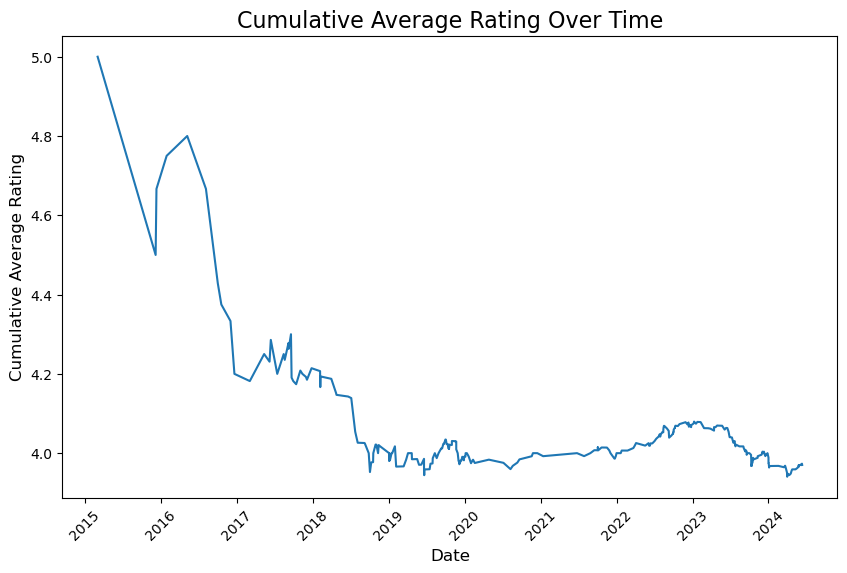

In [18]:
import matplotlib.pyplot as plt

# Plot the cumulative average
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['cumulative_avg'], linestyle='-')

# Customize the plot
plt.title('Cumulative Average Rating Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Average Rating', fontsize=12)
# plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


In [19]:
import plotly.express as px

fig = px.line(df, x='date', y='cumulative_avg', title='Cumulative Average Rating Over Time')

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Cumulative Average Rating',
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
    template='plotly_white'
)

fig.show()
